In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#讀取資料
df = pd.read_excel('C:\\Users\\user\\Desktop\\Titansoft\\Titansoft_BA_Test.xlsx')
#顯示前五筆
display(df.head())

,日期,帳號,貨幣,轉蛋次數,中獎次數,中獎機率,花費金額,累積寶物總價
0,2022-04-21,9B4A3C3069,CNY,45,25,0.5556,8299,4507
1,2022-11-01,527FA2C4FA,TWD,1657,691,0.4170,159082,50695
2,2022-12-27,52634EC827,TWD,1,1,1.0000,55,21
3,2022-11-25,C27DDD5E1C,CNY,5,1,0.2000,150,7
4,2022-08-25,580D884F36,KRW,14,5,0.3571,22220,5999


In [6]:
print(df.dtypes)

日期        datetime64[ns]
帳號                object
貨幣                object
轉蛋次數               int64
中獎次數               int64
中獎機率             float64
花費金額               int64
累積寶物總價             int64
dtype: object


In [53]:
df['count'] = 1
display(df)

,日期,帳號,貨幣,轉蛋次數,中獎次數,中獎機率,花費金額,累積寶物總價,Weekday,count
0,2022-04-21,9B4A3C3069,CNY,45,25,0.5556,8299,4507,Thursday,1
1,2022-11-01,527FA2C4FA,TWD,1657,691,0.4170,159082,50695,Tuesday,1
2,2022-12-27,52634EC827,TWD,1,1,1.0000,55,21,Tuesday,1
3,2022-11-25,C27DDD5E1C,CNY,5,1,0.2000,150,7,Friday,1
4,2022-08-25,580D884F36,KRW,14,5,0.3571,22220,5999,Thursday,1
...,...,...,...,...,...,...,...,...,...,...
90381,2023-05-16,ACF1D8D0A4,CNY,9,3,0.3333,7270,2556,Tuesday,1
90382,2023-06-21,8D9A01A69A,JPY,55,16,0.2909,3720,573,Wednesday,1
90383,2023-06-11,10E41B1956,KRW,1,0,0.0000,40,0,Sunday,1
90384,2023-01-12,E20D333E32,KRW,24,13,0.5417,13620,5804,Thursday,1


In [92]:
#將玩家依日期進行歸戶
df_group = df.groupby(['日期']).agg({
    '轉蛋次數': 'sum',
    '中獎次數': 'sum',
    '花費金額': 'sum',
    '累積寶物總價': 'sum',
    'count':'sum'
}).reset_index()

df_group['中獎機率'] = df_group['中獎次數']/df_group['轉蛋次數']

display(df_group)

,日期,轉蛋次數,中獎次數,花費金額,累積寶物總價,count,中獎機率
0,2022-01-01,11946,5130,7473061,3068851,114,0.429432
1,2022-01-02,12533,5562,5998378,2552661,95,0.443788
2,2022-01-03,11851,4922,6336055,2719534,111,0.415324
3,2022-01-04,10619,4255,4254616,1736828,114,0.400697
4,2022-01-05,11379,4408,5473452,2330020,109,0.387380
...,...,...,...,...,...,...,...
541,2023-06-26,15825,7253,6563480,2796498,197,0.458325
542,2023-06-27,11827,5190,5447686,2277858,195,0.438826
543,2023-06-28,11831,5222,5723089,2400874,183,0.441383
544,2023-06-29,9221,3943,3897011,1546930,176,0.427611


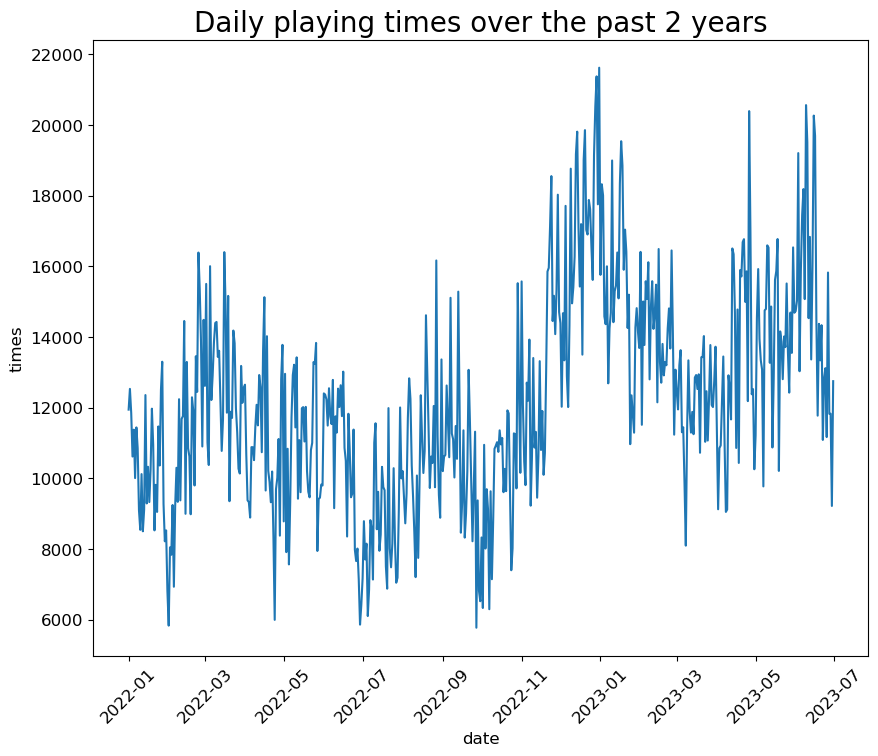

In [93]:
plt.figure(figsize=(10, 8))

plt.plot('日期','轉蛋次數',data=df_group)
plt.title('Daily playing times over the past 2 years',fontsize=20)
plt.xlabel('date',fontsize=12)
plt.xticks(fontsize=12,rotation=45)
plt.ylabel('times',fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [58]:
df['Weekday'] = df['日期'].dt.day_name()

weekday_map = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

df['Weekday_Num'] = df['Weekday'].map(weekday_map)
display(df)

,日期,帳號,貨幣,轉蛋次數,中獎次數,中獎機率,花費金額,累積寶物總價,Weekday,count,Weekday_Num
0,2022-04-21,9B4A3C3069,CNY,45,25,0.5556,8299,4507,Thursday,1,4
1,2022-11-01,527FA2C4FA,TWD,1657,691,0.4170,159082,50695,Tuesday,1,2
2,2022-12-27,52634EC827,TWD,1,1,1.0000,55,21,Tuesday,1,2
3,2022-11-25,C27DDD5E1C,CNY,5,1,0.2000,150,7,Friday,1,5
4,2022-08-25,580D884F36,KRW,14,5,0.3571,22220,5999,Thursday,1,4
...,...,...,...,...,...,...,...,...,...,...,...
90381,2023-05-16,ACF1D8D0A4,CNY,9,3,0.3333,7270,2556,Tuesday,1,2
90382,2023-06-21,8D9A01A69A,JPY,55,16,0.2909,3720,573,Wednesday,1,3
90383,2023-06-11,10E41B1956,KRW,1,0,0.0000,40,0,Sunday,1,7
90384,2023-01-12,E20D333E32,KRW,24,13,0.5417,13620,5804,Thursday,1,4


In [94]:
#將玩家依星期進行歸戶
df_week = df.groupby(['Weekday_Num']).agg({
    '轉蛋次數': 'mean',
    '中獎次數': 'mean',
    '花費金額': 'mean',
    '累積寶物總價': 'mean',
    'count': 'mean'
}).reset_index()

display(df_week)

,Weekday_Num,轉蛋次數,中獎次數,花費金額,累積寶物總價,count
0,1,73.662908,31.807332,41158.216444,17637.856726,1.0
1,2,76.024763,32.834057,41783.253176,17773.619714,1.0
2,3,73.501593,31.484994,39617.231419,16883.768136,1.0
3,4,72.271690,31.148579,40809.957603,17443.089933,1.0
4,5,74.284484,32.093080,46256.126116,19985.732112,1.0
5,6,76.980307,32.861832,46882.633581,20094.365549,1.0
6,7,69.805249,29.974070,39449.698081,16890.516569,1.0


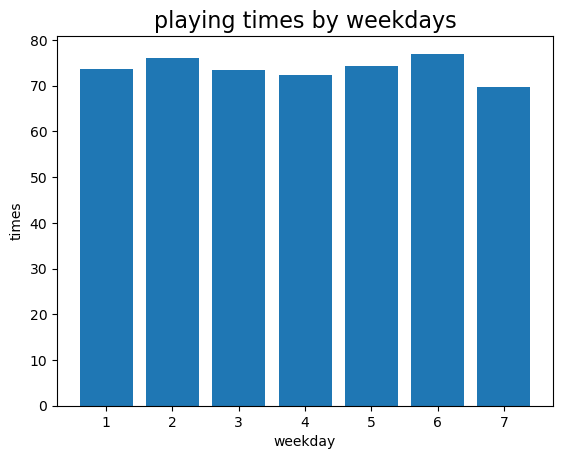

In [98]:
plt.bar('Weekday_Num', '轉蛋次數', data=df_week)

plt.title('playing times by weekdays',fontsize=16)
plt.xlabel('weekday',fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('times',fontsize=10)
plt.yticks(fontsize=10)
plt.show()

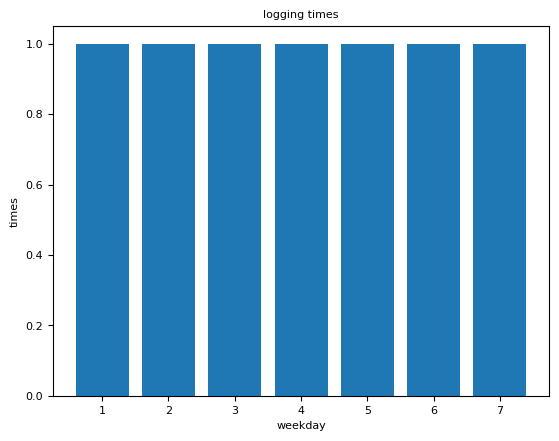

In [96]:
plt.bar('Weekday_Num', 'count', data=df_week)

plt.title('logging times',fontsize=8)
plt.xlabel('weekday',fontsize=8)
plt.xticks(fontsize=8)
plt.ylabel('times',fontsize=8)
plt.yticks(fontsize=8)
plt.show()

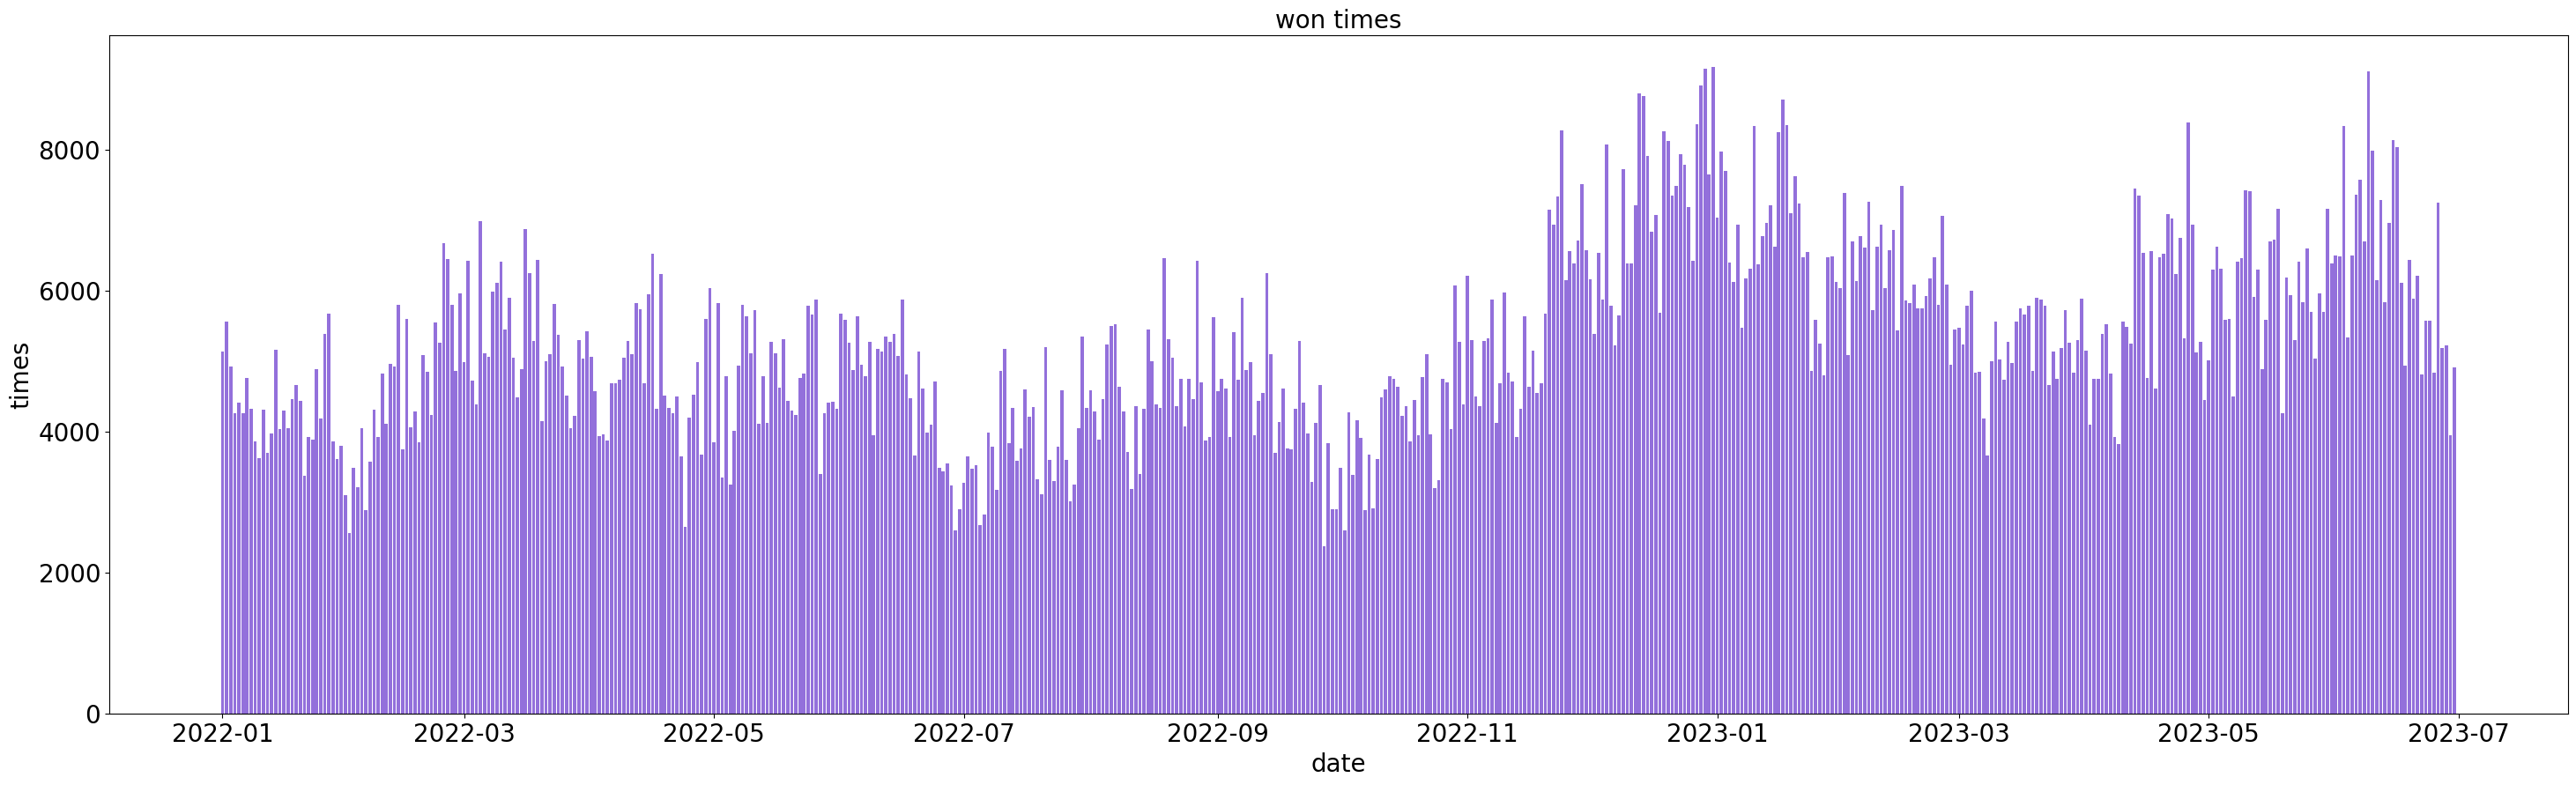

In [48]:
plt.figure(figsize=(36, 10))

plt.bar('日期','中獎次數', data=df_group, color='mediumpurple')
plt.title('won times',fontsize=20)
plt.xlabel('date',fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('times',fontsize=20)
plt.yticks(fontsize=20)
plt.show()

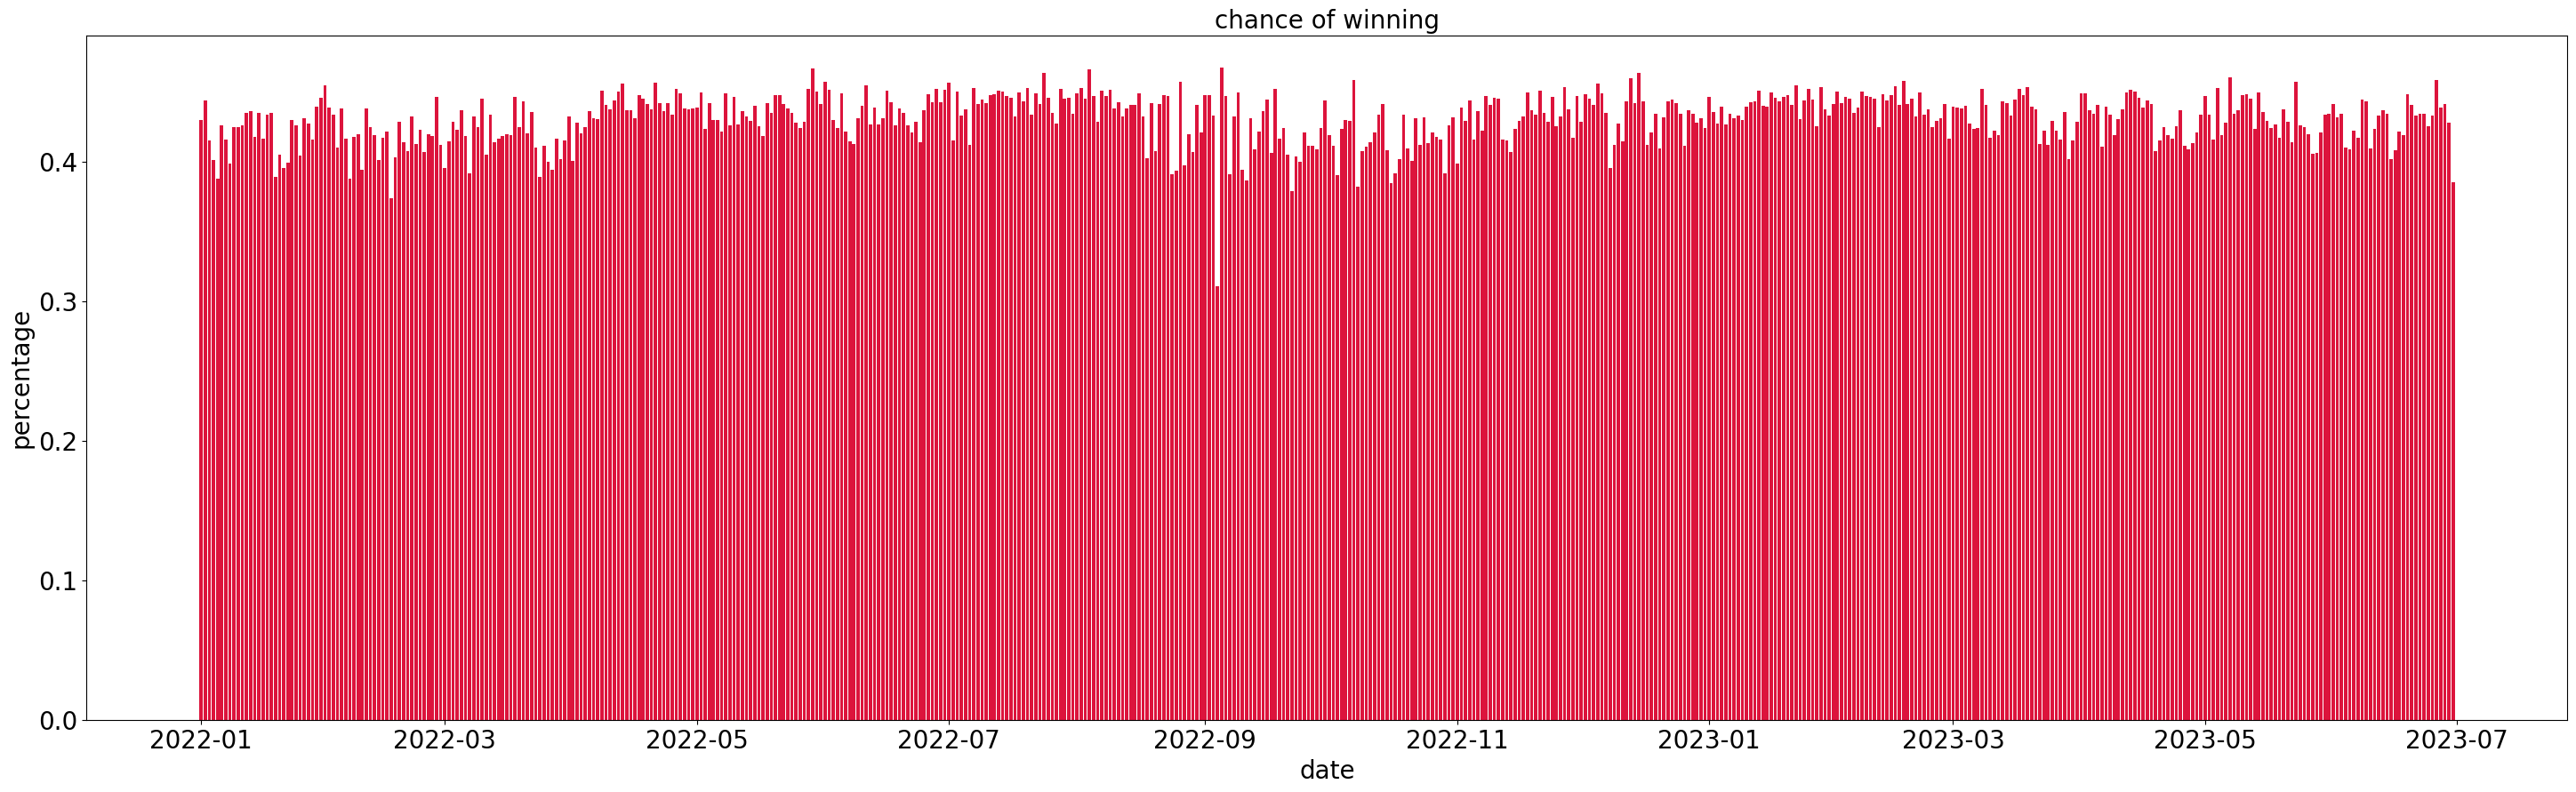

In [49]:
plt.figure(figsize=(36, 10))

plt.bar('日期','中獎機率', data=df_group, color='crimson')
plt.title('chance of winning',fontsize=20)
plt.xlabel('date',fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('percentage',fontsize=20)
plt.yticks(fontsize=20)
plt.show()

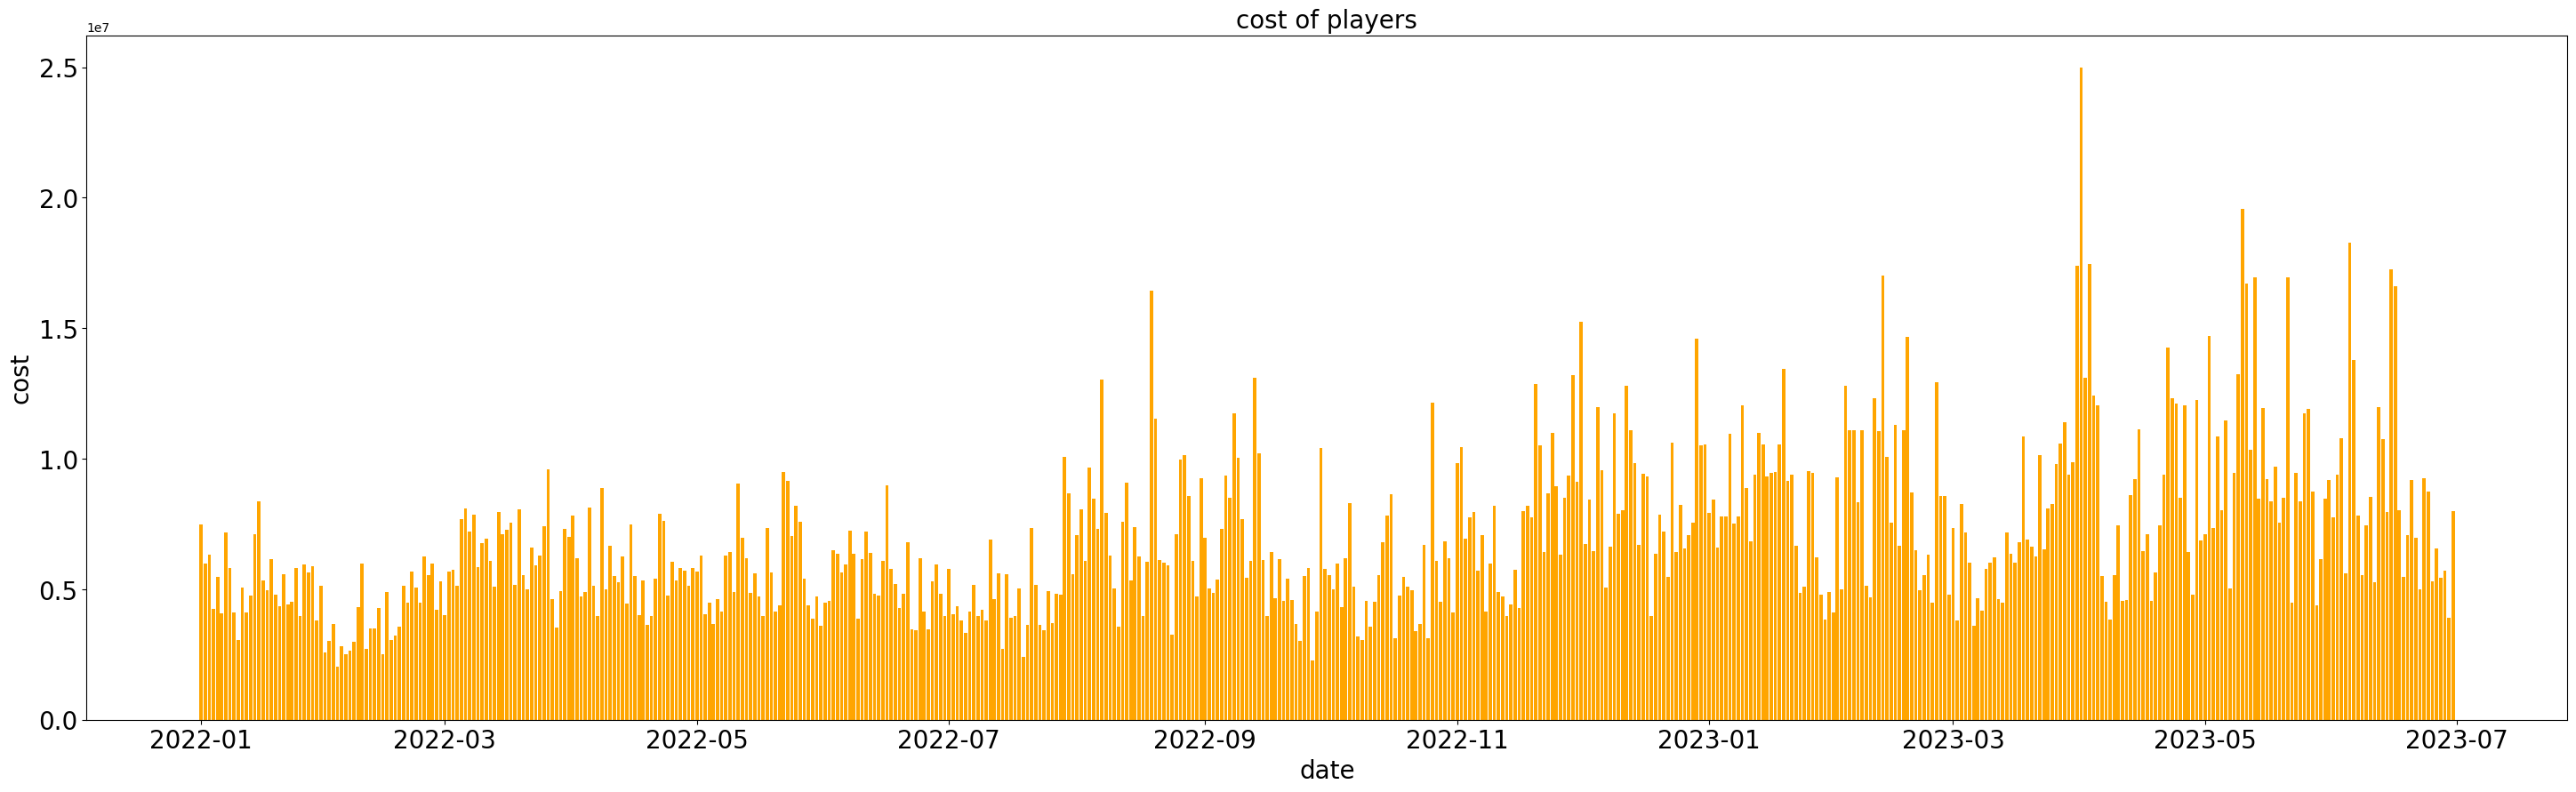

In [47]:
plt.figure(figsize=(36, 10))

plt.bar('日期','花費金額', data=df_group, color='orange')
plt.title('cost of players',fontsize=20)
plt.xlabel('date',fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('cost',fontsize=20)
plt.yticks(fontsize=20)
plt.show()

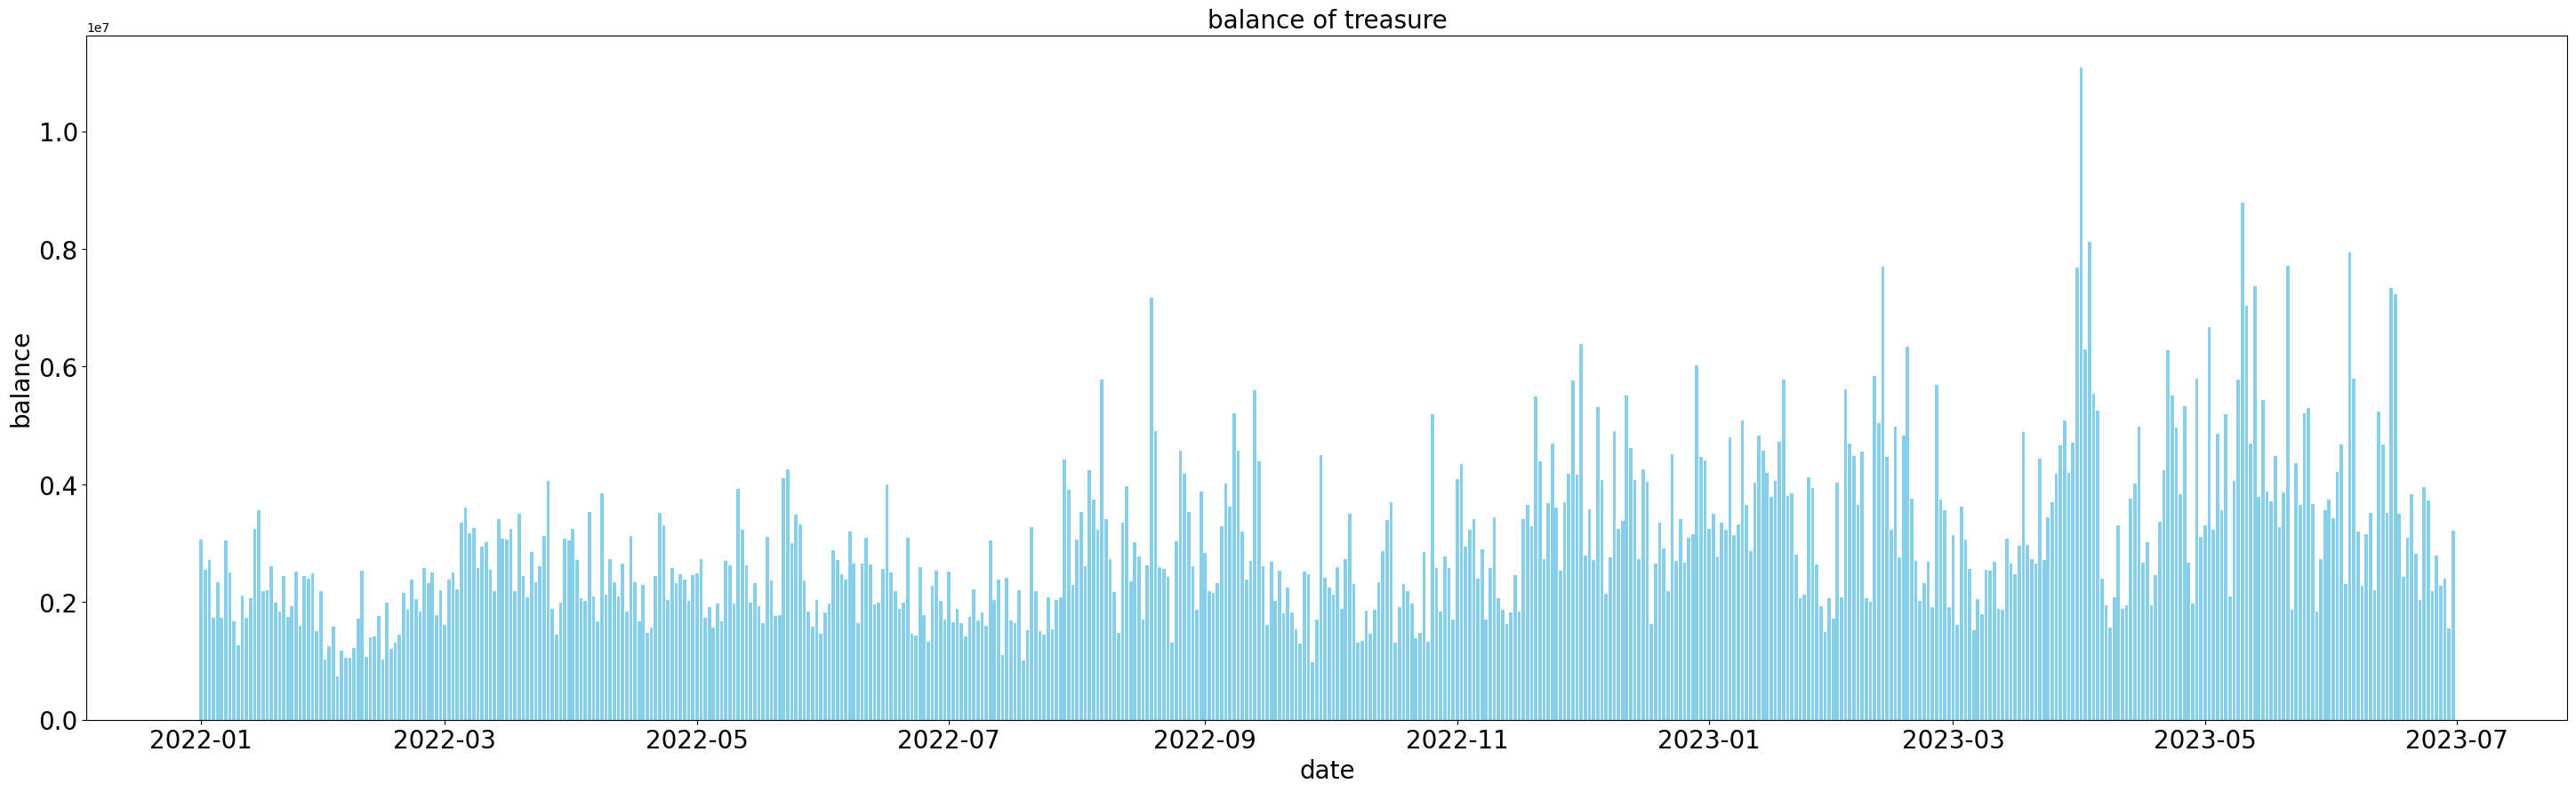

In [52]:
plt.figure(figsize=(36, 10))

plt.bar('日期','累積寶物總價', data=df_group, color='skyblue')
plt.title('balance of treasure',fontsize=20)
plt.xlabel('date',fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('balance',fontsize=20)
plt.yticks(fontsize=20)
plt.show()

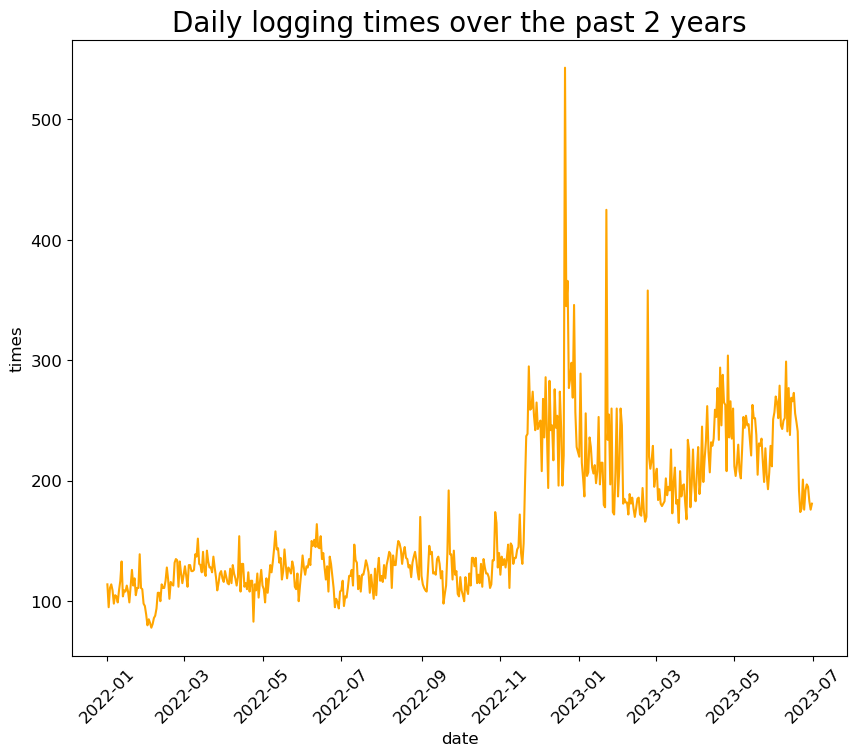

In [105]:
plt.figure(figsize=(10, 8))

plt.plot('日期','count', data=df_group, color='orange')
plt.title('Daily logging times over the past 2 years',fontsize=20)
plt.xlabel('date',fontsize=12)
plt.xticks(fontsize=12,rotation=45)
plt.ylabel('times',fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [107]:
df['Y_M'] = df['日期'].dt.strftime('%Y-%m')

display(df)

,日期,帳號,貨幣,轉蛋次數,中獎次數,中獎機率,花費金額,累積寶物總價,Weekday,count,Weekday_Num,Month,Month_Num,Y_M
0,2022-04-21,9B4A3C3069,CNY,45,25,0.5556,8299,4507,Thursday,1,4,April,4,2022-04
1,2022-11-01,527FA2C4FA,TWD,1657,691,0.4170,159082,50695,Tuesday,1,2,November,11,2022-11
2,2022-12-27,52634EC827,TWD,1,1,1.0000,55,21,Tuesday,1,2,December,12,2022-12
3,2022-11-25,C27DDD5E1C,CNY,5,1,0.2000,150,7,Friday,1,5,November,11,2022-11
4,2022-08-25,580D884F36,KRW,14,5,0.3571,22220,5999,Thursday,1,4,August,8,2022-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90381,2023-05-16,ACF1D8D0A4,CNY,9,3,0.3333,7270,2556,Tuesday,1,2,May,5,2023-05
90382,2023-06-21,8D9A01A69A,JPY,55,16,0.2909,3720,573,Wednesday,1,3,June,6,2023-06
90383,2023-06-11,10E41B1956,KRW,1,0,0.0000,40,0,Sunday,1,7,June,6,2023-06
90384,2023-01-12,E20D333E32,KRW,24,13,0.5417,13620,5804,Thursday,1,4,January,1,2023-01


In [114]:
#將玩家依月份進行歸戶
#改成mean
df_m = df.groupby(['Y_M']).agg({
    '轉蛋次數': 'mean',
    '中獎次數': 'sum',
    '花費金額': 'sum',
    '累積寶物總價': 'sum',
    'count': 'sum'
}).reset_index()

display(df_m)

,Y_M,轉蛋次數,中獎次數,花費金額,累積寶物總價,count
0,2022-01,93.951608,133875,162031502,68438082,3389
1,2022-02,102.764920,128852,113420020,46588695,3016
2,2022-03,100.205518,165702,199161840,84791962,3951
3,2022-04,92.350480,143123,172399283,72994096,3538
4,2022-05,86.712882,146305,176896923,75511313,3866
5,2022-06,82.075032,137896,162940054,69386916,3865
6,2022-07,73.310176,119574,149111041,64036987,3685
7,2022-08,80.413851,144246,233311622,100416402,4144
8,2022-09,82.744038,130042,194232579,83219301,3774
9,2022-10,80.159555,128560,168353740,70901620,3867


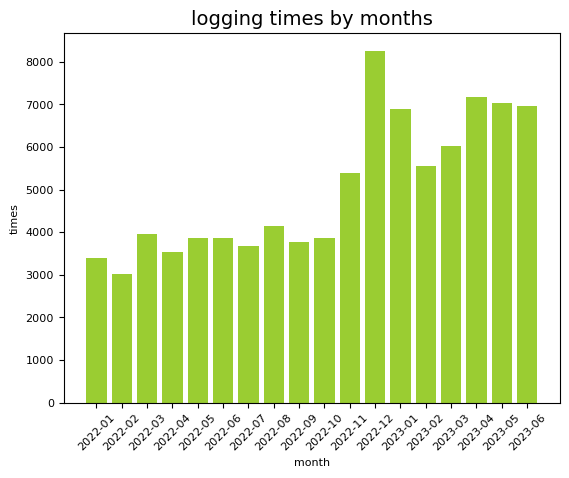

In [116]:
plt.bar('Y_M', 'count', data=df_m, color='yellowgreen')

plt.title('logging times by months',fontsize=14)
plt.xlabel('month',fontsize=8)
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('times',fontsize=8)
plt.yticks(fontsize=8)
plt.show()

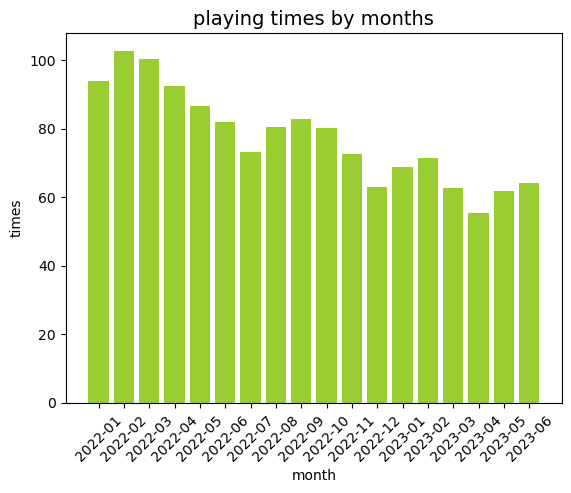

In [117]:
plt.bar('Y_M', '轉蛋次數', data=df_m, color='yellowgreen')

plt.title('playing times by months',fontsize=14)
plt.xlabel('month',fontsize=10)
plt.xticks(fontsize=10, rotation=45)
plt.ylabel('times',fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [78]:
#將玩家依貨幣(地區)進行歸戶
df_country = df.groupby(['貨幣']).agg({
    '轉蛋次數': 'sum',
    '中獎次數': 'sum',
    '花費金額': 'sum',
    '累積寶物總價': 'sum',
    'count': 'sum'
}).reset_index()

display(df_country)

,貨幣,轉蛋次數,中獎次數,花費金額,累積寶物總價,count
0,CNY,1478656,634822,584705127,246394589,19232
1,HKD,1175064,524261,683509200,298179092,17300
2,JPY,1339949,590793,797378892,349183293,15882
3,KRW,1389461,551651,739166677,306166786,18965
4,TWD,1284399,566696,1013428100,434738659,19007
